In [1]:
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deephyper.analysis import rank
from deephyper.analysis._matplotlib import figure_size, update_matplotlib_rc
from lcdb.analysis import read_csv_results

update_matplotlib_rc()
figsize = figure_size(252 * 1.8, 1.0)

In [2]:
# Check the configs.csv to see if the same configuration are indeed evaluated
ip_df = pd.read_csv("configs.csv")
ip_df

,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,pp@cat_encoder,pp@decomposition,pp@featuregen,pp@featureselector,pp@scaler,reg_alpha,reg_lambda,subsample,pp@kernel_pca_kernel,pp@kernel_pca_n_components,pp@poly_degree,pp@selectp_percentile,pp@std_with_std
0,1.000000,0.000001,0.300000,6,1.000000,ordinal,none,none,generic,none,0.000001,1.000000,1.000000,linear,0.250000,2,25,True
1,0.770035,0.007535,0.131246,18,0.000021,onehot,lda,none,none,std,0.053140,0.000003,0.779028,linear,0.250000,2,25,True
2,0.621869,0.146081,0.000009,4,0.718162,onehot,ka_nystroem,none,none,std,0.000012,0.000593,0.895299,linear,0.250000,2,25,False
3,0.665579,17.456965,0.000010,20,0.267449,onehot,none,none,generic,none,0.883140,0.000466,0.980097,linear,0.250000,2,25,True
4,0.812685,0.002628,0.009680,13,0.004097,onehot,lda,poly,generic,std,1.476327,0.000062,0.618032,linear,0.250000,4,25,False
5,0.982032,0.000002,0.006214,16,0.047254,onehot,lda,none,selectp,none,0.386547,0.000748,0.962305,linear,0.250000,2,98,True
6,0.621095,0.438603,0.000006,32,0.000024,ordinal,lda,poly,selectp,std,0.000005,0.025713,0.688900,linear,0.250000,5,63,True
7,0.362400,23.568989,0.153832,6,0.000002,ordinal,fastica,none,none,minmax,0.002441,0.000527,0.610026,linear,0.250000,2,25,True
8,0.682110,0.093618,0.009907,20,0.000200,onehot,fastica,poly,selectp,none,0.016108,0.000009,0.566304,linear,0.250000,4,54,True
9,0.312845,0.000010,0.050654,4,0.067262,ordinal,kernel_pca,poly,selectp,none,0.000086,0.056482,0.840636,linear,0.972276,3,62,True


In [3]:
# Load a dataframe with the results
# The dataframe is sorted by `job_id` (increasing) as parallel jobs scheduled asynchronously 
# may be collected in a different order than when they were submitted.
r_df, r_df_failed = read_csv_results("results.csv")

r_df

,p:colsample_bytree,p:gamma,p:learning_rate,p:max_depth,p:min_child_weight,p:pp@cat_encoder,p:pp@decomposition,p:pp@featuregen,p:pp@featureselector,p:pp@scaler,...,m:openmlid,m:workflow_seed,m:workflow,m:valid_prop,m:test_prop,m:monotonic,m:valid_seed,m:test_seed,m:traceback,m:curve_db
0,1.000000,0.000001,0.300000,6,1.000000,ordinal,none,none,generic,none,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
4,0.770035,0.007535,0.131246,18,0.000021,onehot,lda,none,none,std,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
6,0.621869,0.146081,0.000009,4,0.718162,onehot,ka_nystroem,none,none,std,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
1,0.665579,17.456965,0.000010,20,0.267449,onehot,none,none,generic,none,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
2,0.812685,0.002628,0.009680,13,0.004097,onehot,lda,poly,generic,std,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
9,0.982032,0.000002,0.006214,16,0.047254,onehot,lda,none,selectp,none,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
5,0.621095,0.438603,0.000006,32,0.000024,ordinal,lda,poly,selectp,std,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
7,0.362400,23.568989,0.153832,6,0.000002,ordinal,fastica,none,none,minmax,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
3,0.682110,0.093618,0.009907,20,0.000200,onehot,fastica,poly,selectp,none,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."
8,0.312845,0.000010,0.050654,4,0.067262,ordinal,kernel_pca,poly,selectp,none,...,3,42,XGBoostWorkflow,0.1,0.1,True,42,42,NaN,"{'train_curve': {'anchor': [16, 23, 32, 45, 64..."


In [4]:
# Check the columns
r_df.columns.to_list()

['p:colsample_bytree',
 'p:gamma',
 'p:learning_rate',
 'p:max_depth',
 'p:min_child_weight',
 'p:pp@cat_encoder',
 'p:pp@decomposition',
 'p:pp@featuregen',
 'p:pp@featureselector',
 'p:pp@scaler',
 'p:reg_alpha',
 'p:reg_lambda',
 'p:subsample',
 'p:pp@kernel_pca_kernel',
 'p:pp@kernel_pca_n_components',
 'p:pp@poly_degree',
 'p:pp@selectp_percentile',
 'p:pp@std_with_std',
 'objective',
 'job_id',
 'm:timestamp_submit',
 'm:timestamp_gather',
 'm:timestamp_start',
 'm:timestamp_end',
 'm:memory',
 'm:openmlid',
 'm:workflow_seed',
 'm:workflow',
 'm:valid_prop',
 'm:test_prop',
 'm:monotonic',
 'm:valid_seed',
 'm:test_seed',
 'm:traceback',
 'm:curve_db']

In [9]:
# Cumulated time
duration_wo_overheads = (r_df["m:timestamp_end"] - r_df["m:timestamp_start"]).sum()
print(f"Cumulated time (without submit/gather overheads): {duration_wo_overheads:.2f} s.")

duration_w_overheads = (r_df["m:timestamp_gather"] - r_df["m:timestamp_submit"]).sum()
print(f"Cumulated time (with submit/gather overheads)   : {duration_w_overheads:.2f} s.")

ratio_overheads = (duration_w_overheads - duration_wo_overheads) / duration_wo_overheads
print(f"Overheads accounted for {ratio_overheads*100:.2f} % of the total time.\n")

# Real time
duration_run = (r_df["m:timestamp_gather"].max() - r_df["m:timestamp_submit"].min())
print(f"Real time of execution: {duration_run:.2f} s.\n")

Cumulated time (without submit/gather overheads): 1225.94 s.
Cumulated time (with submit/gather overheads)   : 1526.29 s.
Overheads accounted for 24.50 % of the total time.

Real time of execution: 198.45 s.



In [10]:
duration_job_mean = (r_df["m:timestamp_end"] - r_df["m:timestamp_start"]).mean()
duration_job_std  = (r_df["m:timestamp_end"] - r_df["m:timestamp_start"]).std()

print(f"Mean time per job: {duration_job_mean:.2f} s.")
print(f"Std  time per job: {duration_job_std:.2f} s.")

Mean time per job: 122.59 s.
Std  time per job: 34.48 s.


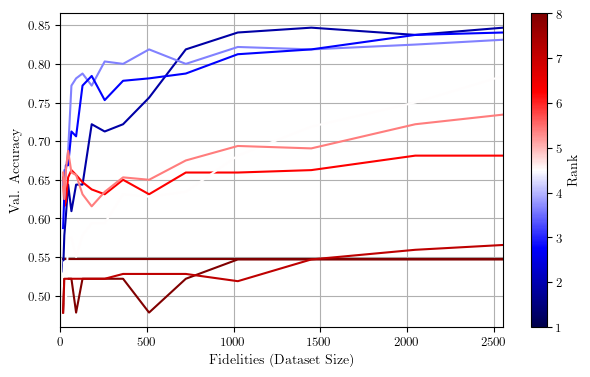

In [21]:
# Configuration of the plot
selected_split = "val"
selected_score = "accuracy"

# Plotting
score = [eval(r_df["m:curve_db"][i])[f"{selected_split}_curve"][selected_score] for i in range(len(r_df))]
fidelities = eval(r_df["m:curve_db"][0])[f"{selected_split}_curve"]["anchor"]

cmap = mpl.colormaps["seismic"]

fig = plt.figure(figsize=figsize)

# corresponds to iloc indexing
scores_max_fidelity = np.array([x[-1] for x in score])
ranking = rank(-scores_max_fidelity, decimals=3)
ranking_max = ranking.max()
for i in range(len(r_df)):
    plt.plot(fidelities, score[i], color=cmap(ranking[i]/ranking_max))

plt.xlabel(f"Fidelities (Dataset Size)")
plt.ylabel(f"{selected_split.capitalize()}. {selected_score.capitalize()}")

plt.grid()

norm = mpl.cm.ScalarMappable(norm=None, cmap=cmap)
norm.set_clim(1, ranking_max)
cb = plt.colorbar(norm, ax=plt.gca(), label="Rank")
plt.xlim(0, np.array(fidelities).max())

plt.tight_layout()
plt.show()

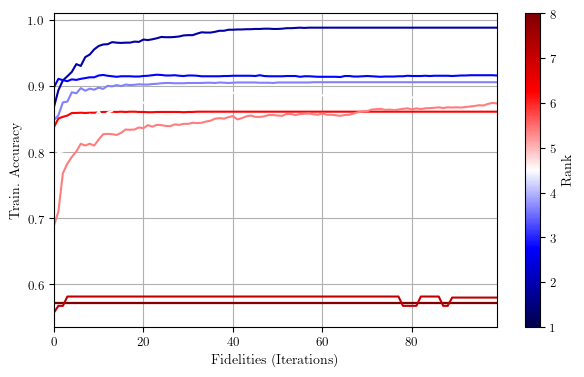

In [22]:
# Configuration of the plot
selected_split = "train"
selected_score = "accuracy"
anchor = 2556

# Plotting
score = [eval(r_df["m:curve_db"][i])["additional_data"][anchor]["fidelities_db"][f"{selected_split}_curve"][selected_score] for i in range(len(r_df))]
fidelities = eval(r_df["m:curve_db"][0])["additional_data"][anchor]["fidelities_db"][f"{selected_split}_curve"]["anchor"]

cmap = mpl.colormaps["seismic"]

fig = plt.figure(figsize=figsize)

# corresponds to iloc indexing
scores_max_fidelity = np.array([x[-1] for x in score])
ranking = rank(-scores_max_fidelity, decimals=3)
ranking_max = ranking.max()
for i in range(len(r_df)):
    plt.plot(fidelities, score[i], color=cmap(ranking[i]/ranking_max))

plt.xlabel(f"Fidelities (Iterations)")
plt.ylabel(f"{selected_split.capitalize()}. {selected_score.capitalize()}")

plt.grid()

norm = mpl.cm.ScalarMappable(norm=None, cmap=cmap)
norm.set_clim(1, ranking_max)
cb = plt.colorbar(norm, ax=plt.gca(), label="Rank")
plt.xlim(0, np.array(fidelities).max())

plt.tight_layout()
plt.show()